#### Loading dataset

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv"
df = pd.read_csv(url)

## Descriptive Analysis

#### Basic Structure

In [3]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [4]:
df.shape

(22029, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [6]:
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000,22029.000000
mean,11015.000000,4.757232,5522.740842,182.863648,2223.807572,50610.402787,6.582323
std,6359.368876,0.960393,2597.666260,301.619721,1394.166380,28542.979123,1.458804
min,1.000000,2.015723,1000.000000,-98.300000,30.000000,1001.000000,4.000000
25%,5508.000000,4.130705,3286.000000,-4.080000,1067.000000,25804.000000,5.000000
50%,11015.000000,4.761527,5525.000000,93.650000,2088.000000,50858.000000,7.000000
75%,16522.000000,5.429335,7766.000000,247.310000,3212.000000,75165.000000,8.000000
max,22029.000000,7.469907,9999.000000,3109.790000,6887.000000,99999.000000,9.000000


#### Data Exploration

In [8]:
df['Campaign_ID'].nunique()

22029

In [9]:
df['Location'].unique()

array(['Houston', 'Washington, D.C.', 'Miami', 'Seattle', 'Chicago',
       'Los Angeles', 'Atlanta', 'Dallas', 'New York', 'San Francisco'],
      dtype=object)

In [10]:
df['Customer_Segment'].unique()

array(['Tech Enthusiasts', 'Foodies', 'Fashionistas',
       'Outdoor Adventurers', 'Health & Wellness'], dtype=object)

In [11]:
df['Campaign_Type'].value_counts()

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

In [12]:
df['Channel_Used'].value_counts()

Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64

## Exploratory Data Analysis

#### Campaign performance

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set(style='whitegrid', palette='pastel')

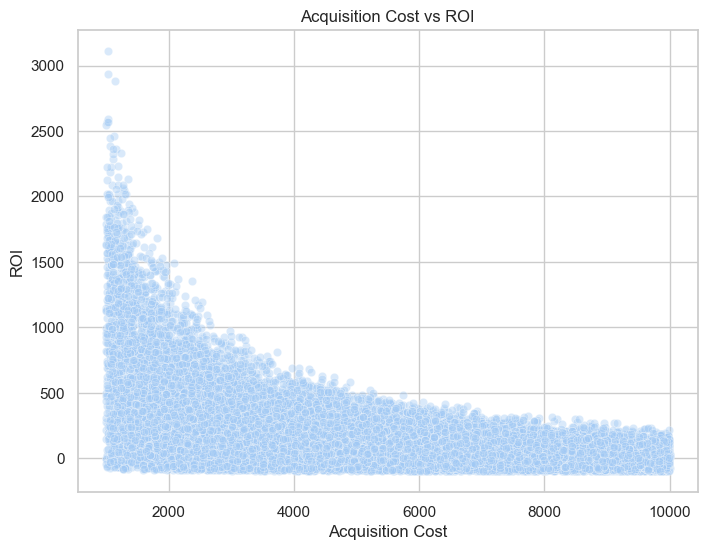

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Acquisition_Cost', y='ROI', alpha=0.4, color=sns.color_palette("pastel")[0])
plt.title('Acquisition Cost vs ROI', fontsize=12)
plt.xlabel('Acquisition Cost')
plt.ylabel('ROI')
plt.show()

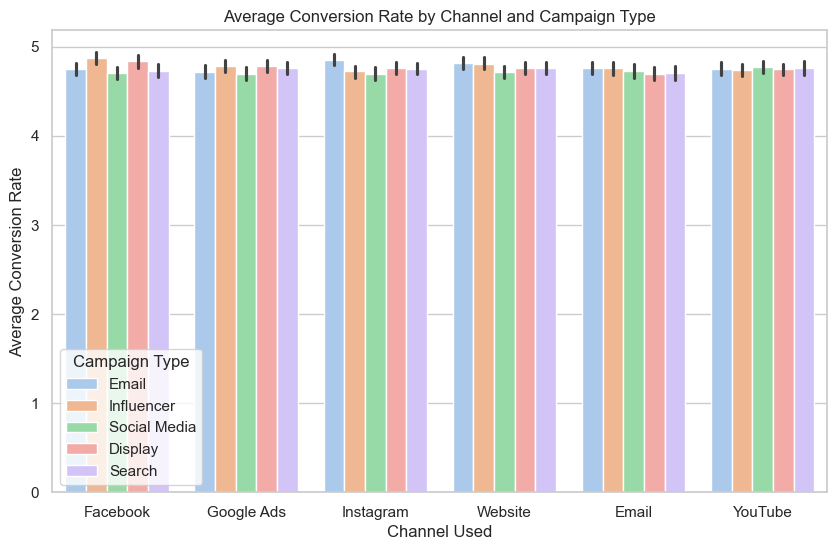

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', estimator='mean')
plt.title('Average Conversion Rate by Channel and Campaign Type', fontsize=12)
plt.xlabel('Channel Used')
plt.ylabel('Average Conversion Rate')
plt.legend(title='Campaign Type')
plt.show()

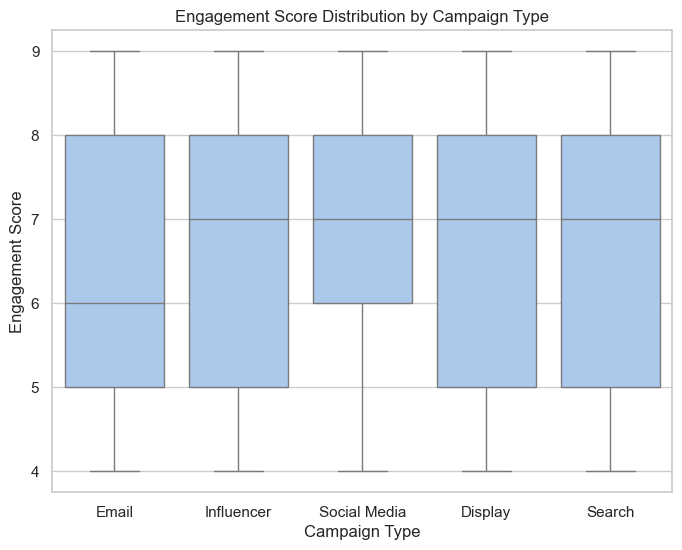

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Campaign_Type', y='Engagement_Score')
plt.title('Engagement Score Distribution by Campaign Type', fontsize=12)
plt.xlabel('Campaign Type')
plt.ylabel('Engagement Score')
plt.show()

C:\Users\fathi\AppData\Local\Temp\ipykernel_23524\1501830963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_roi.index, y=avg_roi.values, palette='pastel')


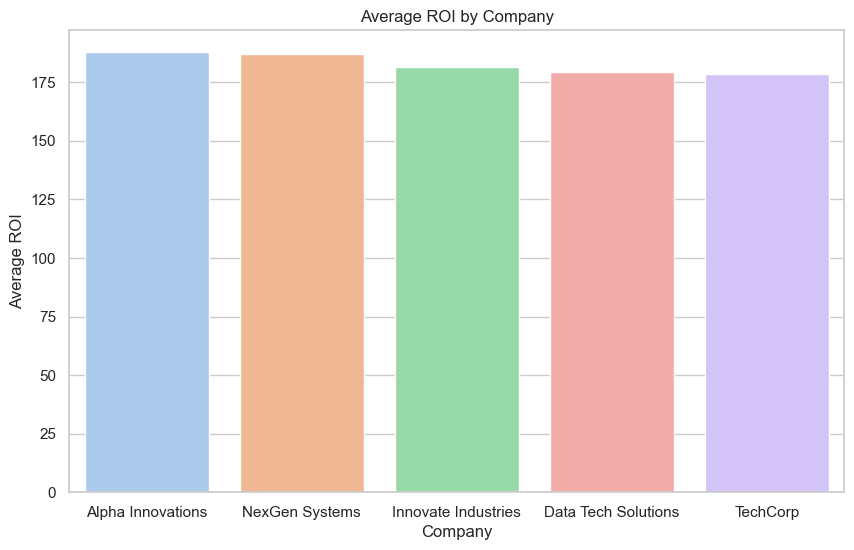

In [21]:
plt.figure(figsize=(10, 6))
avg_roi = df.groupby('Company')['ROI'].mean().sort_values(ascending=False)
sns.barplot(x=avg_roi.index, y=avg_roi.values, palette='pastel')
plt.title('Average ROI by Company', fontsize=12)
plt.xlabel('Company')
plt.ylabel('Average ROI')
plt.show()

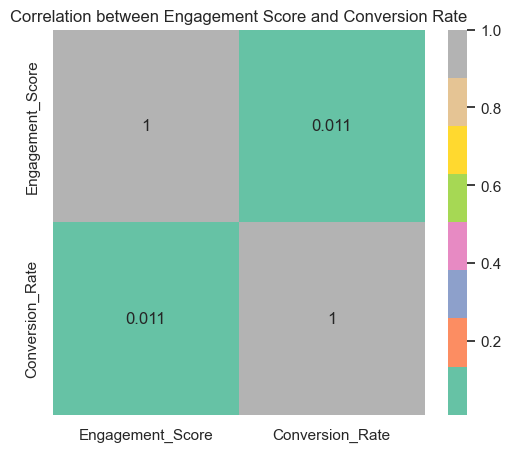

In [23]:
plt.figure(figsize=(6, 5))
corr = df[['Engagement_Score', 'Conversion_Rate']].corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.title('Correlation between Engagement Score and Conversion Rate', fontsize=12)
plt.show()

#### Customer Segmentation

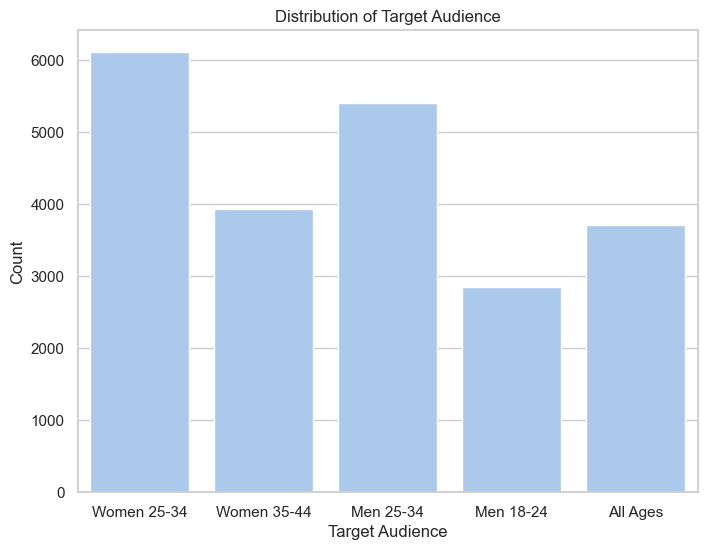

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Target_Audience')
plt.title('Distribution of Target Audience')
plt.xlabel('Target Audience')
plt.ylabel('Count')
plt.show()

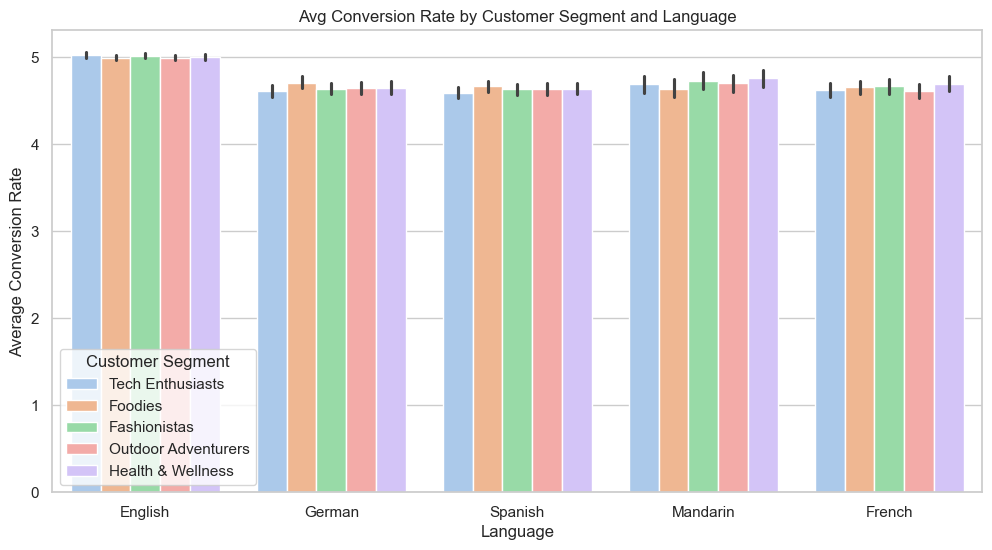

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Language', y='Conversion_Rate', hue='Customer_Segment', estimator='mean')
plt.title('Avg Conversion Rate by Customer Segment and Language')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.legend(title='Customer Segment')
plt.show()

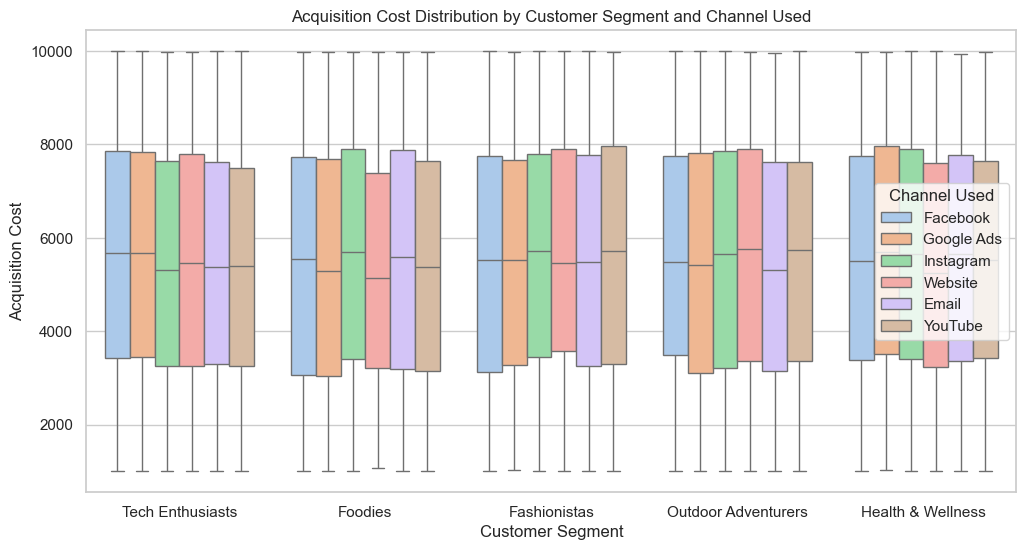

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Customer_Segment', y='Acquisition_Cost', hue='Channel_Used')
plt.title('Acquisition Cost Distribution by Customer Segment and Channel Used')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.legend(title='Channel Used')
plt.show()

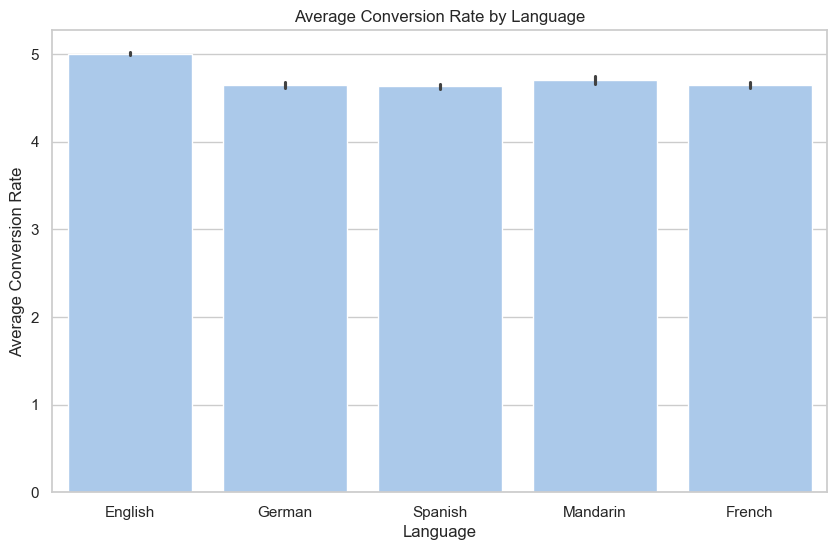

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Language', y='Conversion_Rate', estimator='mean')
plt.title('Average Conversion Rate by Language')
plt.xlabel('Language')
plt.ylabel('Average Conversion Rate')
plt.show()

#### Channel Effectiveness

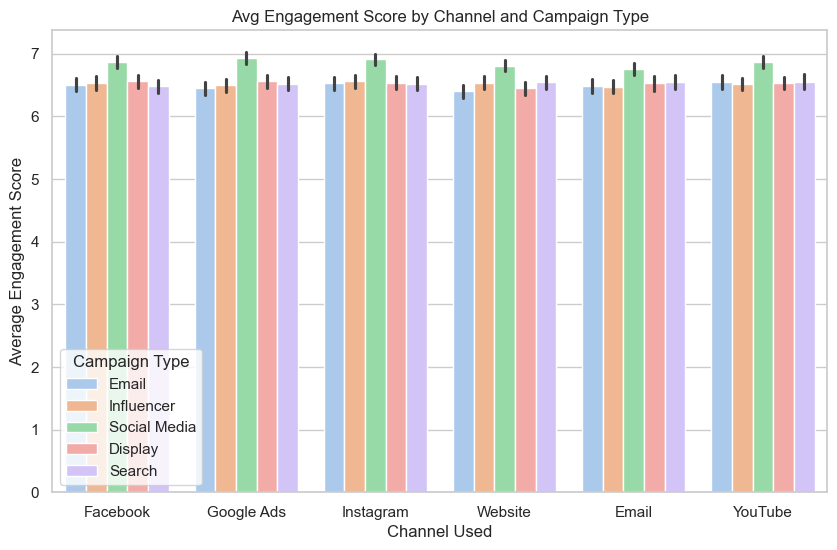

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', estimator='mean')
plt.title('Avg Engagement Score by Channel and Campaign Type')
plt.xlabel('Channel Used')
plt.ylabel('Average Engagement Score')
plt.legend(title='Campaign Type')
plt.show()

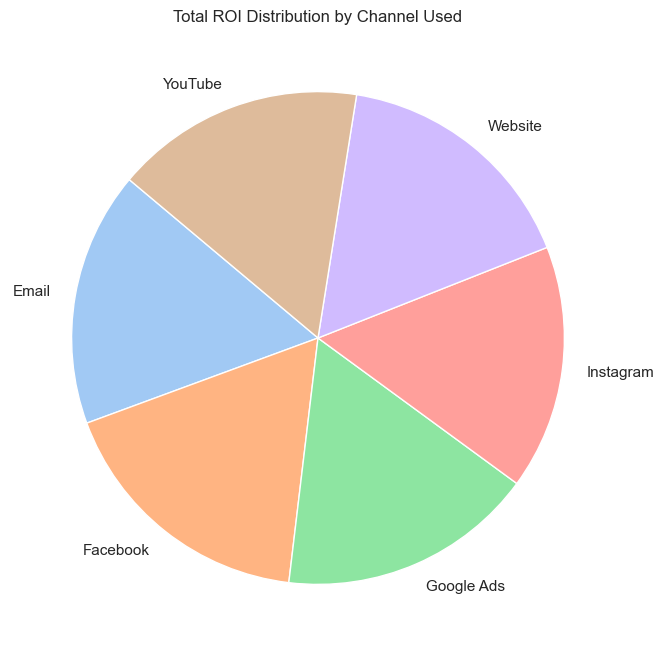

In [30]:
roi_by_channel = df.groupby('Channel_Used')['ROI'].sum()

plt.figure(figsize=(8, 8))
plt.pie(roi_by_channel, labels=roi_by_channel.index, startangle=140, colors=sns.color_palette('pastel'))
plt.title('Total ROI Distribution by Channel Used')
plt.show()

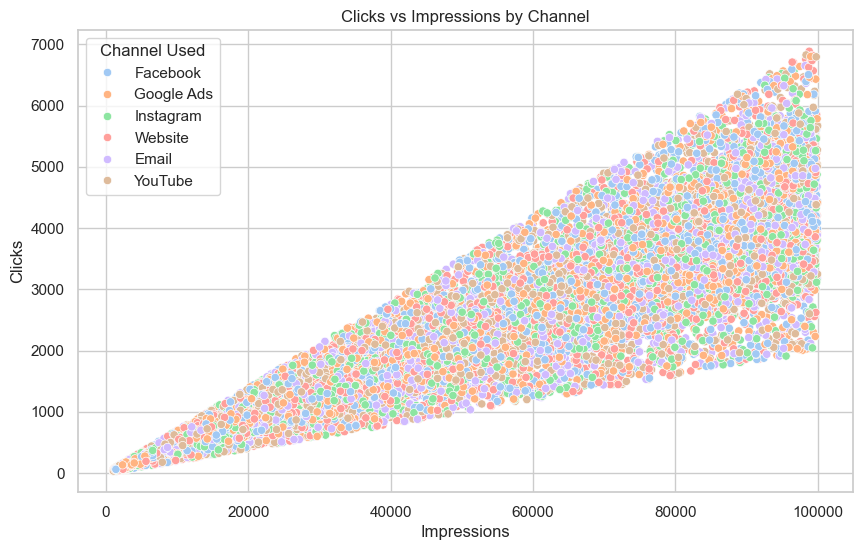

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Impressions', y='Clicks', hue='Channel_Used')
plt.title('Clicks vs Impressions by Channel')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.legend(title='Channel Used')
plt.show()

#### Time-Based Analysis

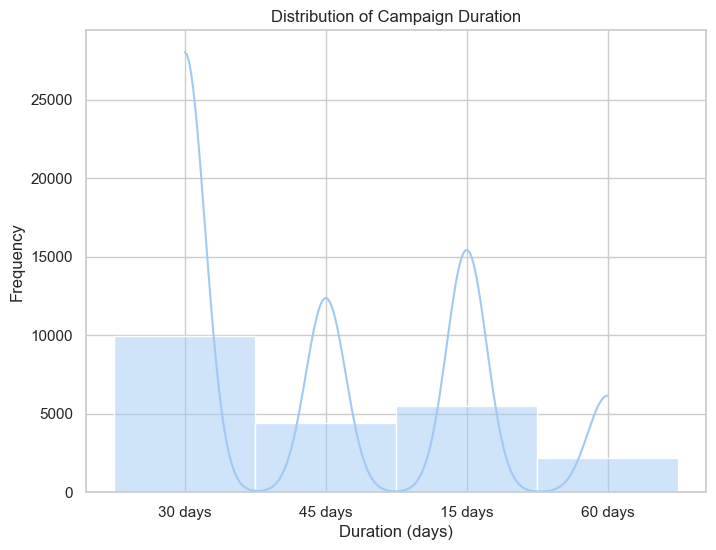

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Duration', bins=20, kde=True, color=sns.color_palette('pastel')[0])
plt.title('Distribution of Campaign Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [34]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [43]:
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

In [44]:
monthly_avg = df.groupby(['Month', 'Company'])['Conversion_Rate'].mean().reset_index()

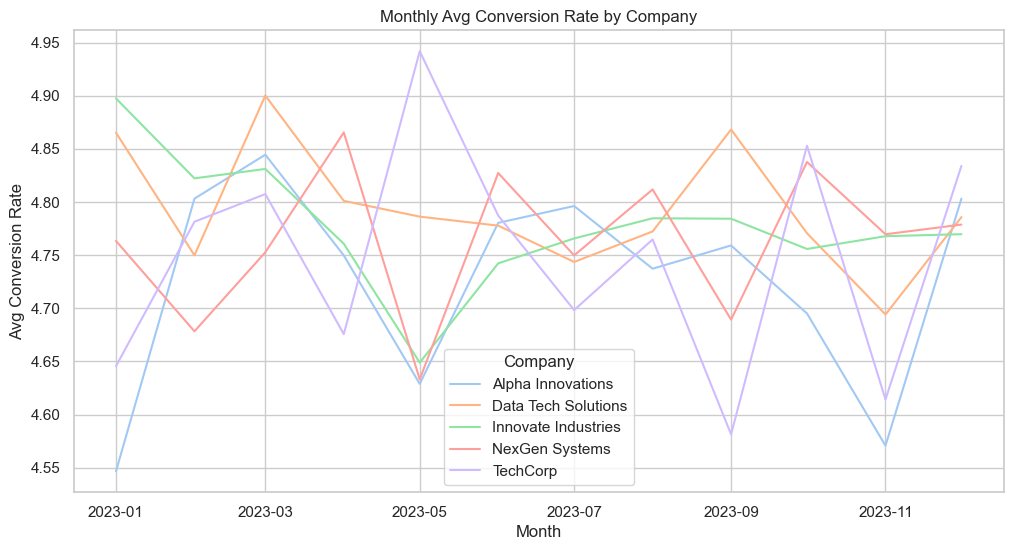

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Conversion_Rate', hue='Company')
plt.title('Monthly Avg Conversion Rate by Company')
plt.xlabel('Month')
plt.ylabel('Avg Conversion Rate')
plt.legend(title='Company')
plt.show()

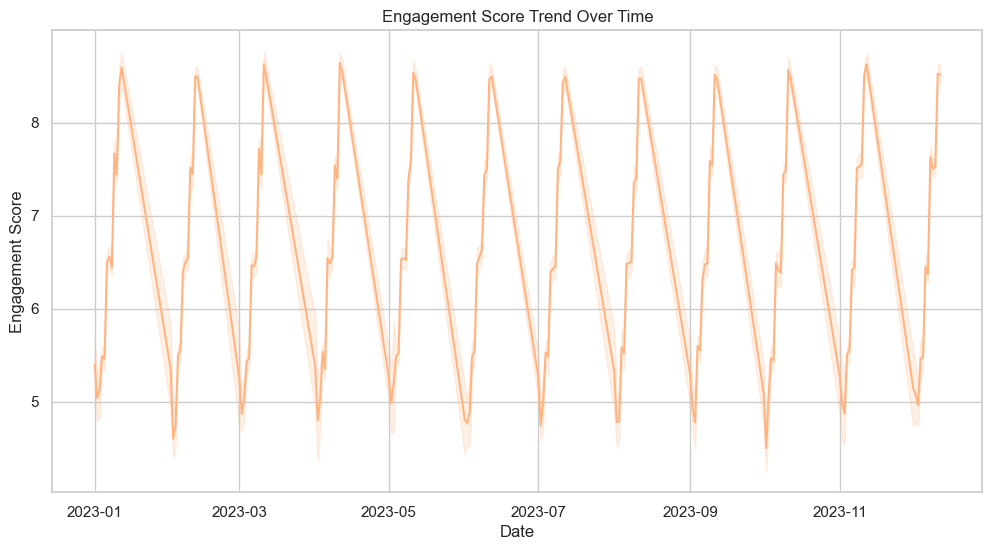

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Engagement_Score', color=sns.color_palette('pastel')[1])
plt.title('Engagement Score Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Engagement Score')
plt.show()

#### Geographic Analysis

C:\Users\fathi\AppData\Local\Temp\ipykernel_23524\693136118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_by_location.index, y=avg_cost_by_location.values, palette='pastel')


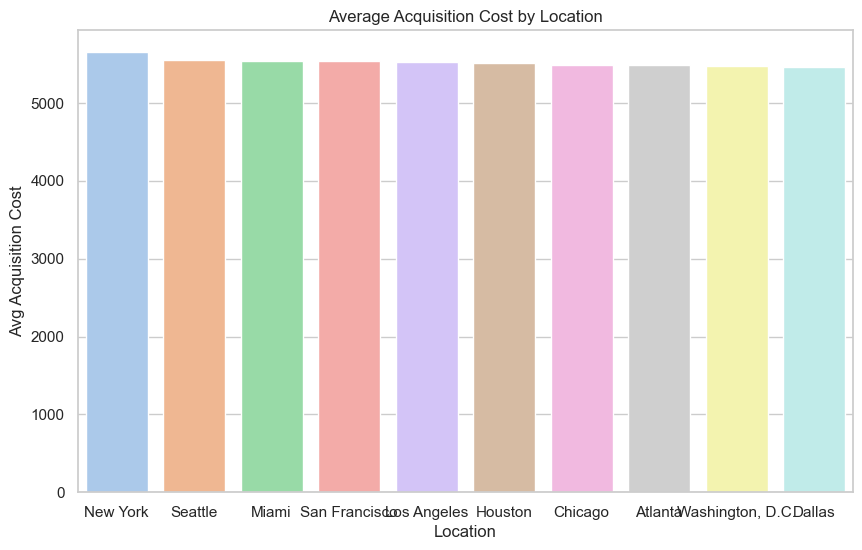

In [37]:
plt.figure(figsize=(10, 6))
avg_cost_by_location = df.groupby('Location')['Acquisition_Cost'].mean().sort_values(ascending=False)

sns.barplot(x=avg_cost_by_location.index, y=avg_cost_by_location.values, palette='pastel')
plt.title('Average Acquisition Cost by Location')
plt.xlabel('Location')
plt.ylabel('Avg Acquisition Cost')
plt.show()

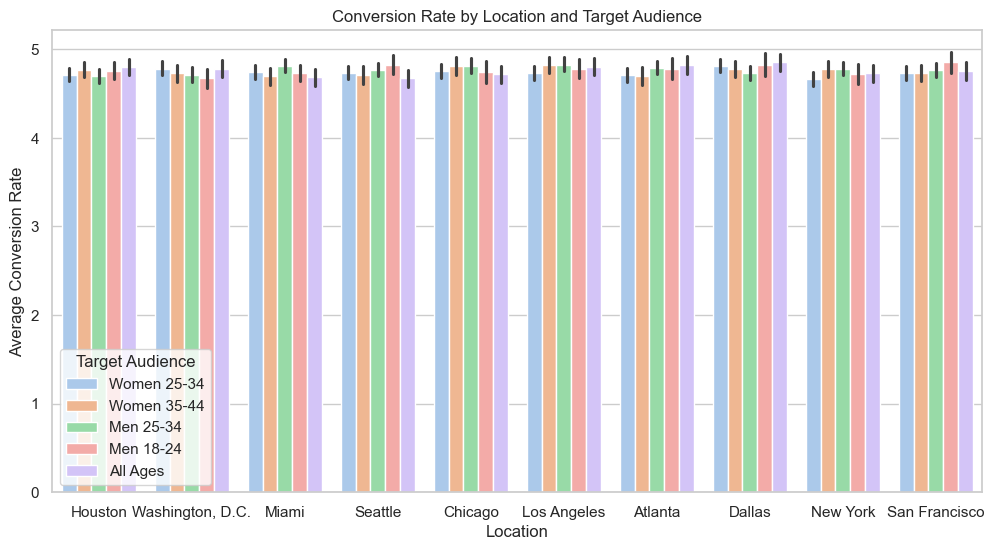

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Location', y='Conversion_Rate', hue='Target_Audience', estimator='mean')
plt.title('Conversion Rate by Location and Target Audience')
plt.xlabel('Location')
plt.ylabel('Average Conversion Rate')
plt.legend(title='Target Audience')
plt.show()

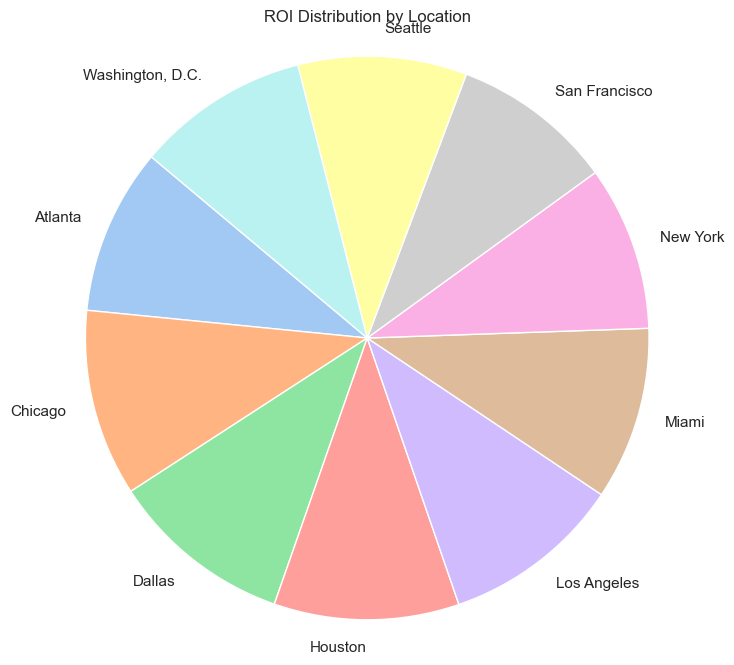

In [39]:
roi_by_location = df.groupby('Location')['ROI'].sum()

plt.figure(figsize=(8, 8))
plt.pie(roi_by_location, labels=roi_by_location.index, startangle=140, colors=sns.color_palette('pastel'))
plt.title('ROI Distribution by Location')
plt.axis('equal')
plt.show()